In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

# skin care

In [36]:
url="https://www.nykaa.com/natural/skin/c/9565?transaction_id=7539f02eff41f2864f50a8425bf1d37f&intcmp=nykaa:sp:natural-native:natural:natural-curated:COLUMN_GRID_V2:4:skin:-1:7539f02eff41f2864f50a8425bf1d37f"

In [37]:
page=requests.get(url)
page

<Response [200]>

In [38]:
soup=BeautifulSoup(page.text)

In [39]:
#multipage idea
for i in range(1,26):
    url= f'page{i}'
    print(url)

page1
page2
page3
page4
page5
page6
page7
page8
page9
page10
page11
page12
page13
page14
page15
page16
page17
page18
page19
page20
page21
page22
page23
page24
page25


In [40]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

# Initialize empty lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = [] 
Bestseller = []

# Pages to loop through
for i in range(1, 100):
    url = f'https://www.nykaa.com/natural/skin/c/9565?page_no={i}&sort=popularity'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Loop through product cards
    for product_div in soup.find_all("div", class_="css-d5z3ro"):
        text = product_div.get_text()

        # Extract title
        title_tag = product_div.find("div", class_='css-xrzmfa')
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)

            # Sub_Category extraction from title using regex
            category_match = re.search(r"(Shampoo|Serum|Conditioner|Mask|Oil|Spray|Facial Kit|Face Pack|Cream|Gel|Color|Toner|Cleanser|Moisturizer|Moisturiser|Sunscreen|Scrub|Wash|Patch|Mist|Lotion)", full_title, re.IGNORECASE)
            category = category_match.group(1).capitalize() if category_match else "Unknown"
            Sub_Category.append(category)
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Use regex to find brand in the title
        b = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(b[0] if b else np.nan)

        # Extract MRP
        M = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(M.group(1)) if M else np.nan)

        # Discounted Price and Percentage
        A = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if A:
            afterDiscountPrice.append(int(A.group(1)))
            discountPercent.append(int(A.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review count
        review_tag = product_div.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.get_text())
            reviewCounts.append(int(review_match.group(0)) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Complimentary Gift
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # category
        Category.append("Skin Care")

        # Bestseller detection
        bestseller_tag = product_div.find("div", class_="css-wkluxr")
        if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper():
            Bestseller.append("Yes")
        else:
            Bestseller.append("No")


In [41]:
print(f"Titles: {len(title)}")
print(f"Brand: {len(Brand)}")
print(f"Category: {len(Category)}")
print(f"Sub_Category: {len(Sub_Category)}")
print(f"Mrp: {len(Mrp)}")
print(f"After Discount Price: {len(afterDiscountPrice)}")
print(f"Discount Percent: {len(discountPercent)}")
print(f"Review Counts: {len(reviewCounts)}")
print(f"Gift: {len(Gift)}")
print(f"Bestseller: {len(Bestseller)}")

Titles: 1980
Brand: 1980
Category: 1980
Sub_Category: 1980
Mrp: 1980
After Discount Price: 1980
Discount Percent: 1980
Review Counts: 1980
Gift: 1980
Bestseller: 1980


In [42]:
data = {
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "Discount_Percent": discountPercent,
    "After_Discount_Price": afterDiscountPrice,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
}

df1 = pd.DataFrame(data)

df1

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Lotus Botanicals 100x Vitamin C Matte Fluid Su...,Lotus Botanicals,Skin Care,Sunscreen,695,32.0,473.0,647.0,No,No
1,Simple Kind To Skin Refreshing Facial Wash,Simple Kind,Skin Care,Wash,420,10.0,378.0,84681.0,No,Yes
2,"Plum 3% Niacinamide Toner With Rice Water, For...",NaN,Skin Care,Toner,440,58.0,40.0,37453.0,Yes,Yes
3,Plum 2% Niacinamide And Rice Water Moisturiser...,NaN,Skin Care,Moisturiser,525,12.0,462.0,15869.0,Yes,Yes
4,VILVAH Milk Drops Skin Brightening Serum,VILVAH Milk,Skin Care,Serum,640,85.0,60.0,2063.0,No,No
...,...,...,...,...,...,...,...,...,...,...
1975,Khadi Natural Gold Peel Off Mask Anti- Ageing ...,Khadi Natural,Skin Care,Mask,195,30.0,137.0,2005.0,No,No
1976,Nature's Essence Facialist Anti Pigmentation C...,Nature's Essence,Skin Care,Cream,340,18.0,279.0,115.0,No,No
1977,Khadi Natural Gold Thermo Herb Face Pack,Khadi Natural,Skin Care,Face pack,199,30.0,139.0,76.0,No,No
1978,Oxyglow Herbals Diamond Facial Kit,Oxyglow Herbals,Skin Care,Facial kit,1395,25.0,1046.0,198.0,No,No


In [43]:
df1.drop(df1[df1['Sub_Category'] == 'Unknown'].index, inplace=True)

In [44]:
df1

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Lotus Botanicals 100x Vitamin C Matte Fluid Su...,Lotus Botanicals,Skin Care,Sunscreen,695,32.0,473.0,647.0,No,No
1,Simple Kind To Skin Refreshing Facial Wash,Simple Kind,Skin Care,Wash,420,10.0,378.0,84681.0,No,Yes
2,"Plum 3% Niacinamide Toner With Rice Water, For...",NaN,Skin Care,Toner,440,58.0,40.0,37453.0,Yes,Yes
3,Plum 2% Niacinamide And Rice Water Moisturiser...,NaN,Skin Care,Moisturiser,525,12.0,462.0,15869.0,Yes,Yes
4,VILVAH Milk Drops Skin Brightening Serum,VILVAH Milk,Skin Care,Serum,640,85.0,60.0,2063.0,No,No
...,...,...,...,...,...,...,...,...,...,...
1975,Khadi Natural Gold Peel Off Mask Anti- Ageing ...,Khadi Natural,Skin Care,Mask,195,30.0,137.0,2005.0,No,No
1976,Nature's Essence Facialist Anti Pigmentation C...,Nature's Essence,Skin Care,Cream,340,18.0,279.0,115.0,No,No
1977,Khadi Natural Gold Thermo Herb Face Pack,Khadi Natural,Skin Care,Face pack,199,30.0,139.0,76.0,No,No
1978,Oxyglow Herbals Diamond Facial Kit,Oxyglow Herbals,Skin Care,Facial kit,1395,25.0,1046.0,198.0,No,No


# Hair Care

In [45]:
url="https://www.nykaa.com/natural/hair/c/9597?transaction_id=739a9927ebea37edddf11b3ea530769f&intcmp=nykaa:sp:natural-native:natural:natural-curated:COLUMN_GRID_V2:4:hair:-1:739a9927ebea37edddf11b3ea530769f"

In [46]:
page=requests.get(url)
page

<Response [200]>

In [47]:
soup=BeautifulSoup(page.text)

In [48]:
#multipage idea
for i in range(1,26):
    url= f'page{i}'
    print(url)

page1
page2
page3
page4
page5
page6
page7
page8
page9
page10
page11
page12
page13
page14
page15
page16
page17
page18
page19
page20
page21
page22
page23
page24
page25


In [49]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

# Initialize empty lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = [] 
Bestseller = []

# Pages to loop through
for i in range(1, 100):
    url = f'https://www.nykaa.com/natural/hair/c/9597?page_no={i}&sort=popularity'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Loop through product cards
    for product_div in soup.find_all("div", class_="css-d5z3ro"):
        text = product_div.get_text()

        # Extract title
        title_tag = product_div.find("div", class_='css-xrzmfa')
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)

            # Sub_Category extraction from title using regex
            category_match = re.search(r"(Shampoo|Serum|Conditioner|Mask|Oil|Spray|Cream|Gel|Color|Toner|Cleanser|Moisturizer|Moisturiser|Sunscreen|Scrub|Wash|Patch|Mist|Lotion)", full_title, re.IGNORECASE)
            category = category_match.group(1).capitalize() if category_match else "Unknown"
            Sub_Category.append(category)
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Use regex to find brand in the title
        b = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(b[0] if b else np.nan)

        # Extract MRP
        M = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(M.group(1)) if M else np.nan)

        # Discounted Price and Percentage
        A = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if A:
            afterDiscountPrice.append(int(A.group(1)))
            discountPercent.append(int(A.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review count
        review_tag = product_div.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.get_text())
            reviewCounts.append(int(review_match.group(0)) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Complimentary Gift
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # category
        Category.append("Hair Care")

        # Bestseller detection
        bestseller_tag = product_div.find("div", class_="css-wkluxr")
        if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper():
            Bestseller.append("Yes")
        else:
            Bestseller.append("No")


In [50]:
print(f"Titles: {len(title)}")
print(f"Brand: {len(Brand)}")
print(f"Category: {len(Category)}")
print(f"Sub_Category: {len(Sub_Category)}")
print(f"Mrp: {len(Mrp)}")
print(f"After Discount Price: {len(afterDiscountPrice)}")
print(f"Discount Percent: {len(discountPercent)}")
print(f"Review Counts: {len(reviewCounts)}")
print(f"Gift: {len(Gift)}")
print(f"Bestseller: {len(Bestseller)}")

Titles: 1980
Brand: 1980
Category: 1980
Sub_Category: 1980
Mrp: 1980
After Discount Price: 1980
Discount Percent: 1980
Review Counts: 1980
Gift: 1980
Bestseller: 1980


In [51]:
data = {
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "Discount_Percent": discountPercent,
    "After_Discount_Price": afterDiscountPrice,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
}

df2 = pd.DataFrame(data)

df2

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Brasil Cacau Extreme Repair Conditioner For Da...,Brasil Cacau,Hair Care,Conditioner,1850,15.0,1573.0,407.0,No,No
1,Wishcare Hair Growth Serum Concentrate With 3%...,Wishcare Hair,Hair Care,Serum,999,30.0,699.0,28795.0,No,Yes
2,Love Beauty & Planet Argan Oil And Lavender Su...,Love Beauty,Hair Care,Oil,740,15.0,629.0,44047.0,No,Yes
3,"inde wild Champi Hair Oil With Bhringraj, Brah...",inde wild,Hair Care,Oil,949,10.0,854.0,2451.0,No,Yes
4,Cadiveu Brasil Cacau Anti Frizz Conditioner Fo...,Cadiveu Brasil,Hair Care,Conditioner,1850,15.0,1573.0,770.0,No,No
...,...,...,...,...,...,...,...,...,...,...
1975,Mantra Herbal Shikakai And Bhringraj Mild Hair...,Mantra Herbal,Hair Care,Cleanser,1199,10.0,1079.0,13.0,No,No
1976,MINATURE Glacial Marine Clay Powder,MINATURE Glacial,Hair Care,Unknown,449,35.0,292.0,NaN,No,No
1977,Rejuvenating UBTAN Neeli Bringadi Herb Enriche...,Rejuvenating UBTAN,Hair Care,Unknown,7992,NaN,NaN,NaN,No,No
1978,Globus Naturals Anti Dandruff Shampoo,Globus Naturals,Hair Care,Shampoo,450,40.0,270.0,NaN,No,No


In [52]:
df2.drop(df2[df2['Sub_Category'] == 'Unknown'].index, inplace=True)

In [53]:
df2

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Brasil Cacau Extreme Repair Conditioner For Da...,Brasil Cacau,Hair Care,Conditioner,1850,15.0,1573.0,407.0,No,No
1,Wishcare Hair Growth Serum Concentrate With 3%...,Wishcare Hair,Hair Care,Serum,999,30.0,699.0,28795.0,No,Yes
2,Love Beauty & Planet Argan Oil And Lavender Su...,Love Beauty,Hair Care,Oil,740,15.0,629.0,44047.0,No,Yes
3,"inde wild Champi Hair Oil With Bhringraj, Brah...",inde wild,Hair Care,Oil,949,10.0,854.0,2451.0,No,Yes
4,Cadiveu Brasil Cacau Anti Frizz Conditioner Fo...,Cadiveu Brasil,Hair Care,Conditioner,1850,15.0,1573.0,770.0,No,No
...,...,...,...,...,...,...,...,...,...,...
1970,Vaadi Herbals Lavender Shampoo With Rosemary E...,Vaadi Herbals,Hair Care,Shampoo,335,15.0,285.0,5.0,No,No
1972,Ancient Living Hibiscus & Bhringraj Hair Oil,Ancient Living,Hair Care,Oil,295,NaN,NaN,33.0,No,No
1975,Mantra Herbal Shikakai And Bhringraj Mild Hair...,Mantra Herbal,Hair Care,Cleanser,1199,10.0,1079.0,13.0,No,No
1978,Globus Naturals Anti Dandruff Shampoo,Globus Naturals,Hair Care,Shampoo,450,40.0,270.0,NaN,No,No


# Personal Care (Body Care)

In [54]:
url="https://www.nykaa.com/natural/body-care/c/9605?transaction_id=d44c3f5c264f2eebde96ede4fb399cfa&intcmp=nykaa:sp:natural-native:natural:natural-curated:COLUMN_GRID_V2:4:body%20care:-1:d44c3f5c264f2eebde96ede4fb399cfa"

In [55]:
page=requests.get(url)
page

<Response [200]>

In [56]:
soup=BeautifulSoup(page.text)

In [57]:
#multipage idea
for i in range(1,26):
    url= f'page{i}'
    print(url)

page1
page2
page3
page4
page5
page6
page7
page8
page9
page10
page11
page12
page13
page14
page15
page16
page17
page18
page19
page20
page21
page22
page23
page24
page25


In [58]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

# Initialize empty lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = [] 
Bestseller = []

# Pages to loop through
for i in range(1, 100):
    url = f'https://www.nykaa.com/natural/body-care/c/9605?page_no={i}&sort=popularity'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Loop through product cards
    for product_div in soup.find_all("div", class_="css-d5z3ro"):
        text = product_div.get_text()

        # Extract title
        title_tag = product_div.find("div", class_='css-xrzmfa')
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)

            # Sub_Category extraction from title using regex
            category_match = re.search(r"(Shampoo|Serum|Conditioner|Mask|Oil|Spray|Cream|Gel|Color|Toner|Cleanser|Moisturizer|Moisturiser|Sunscreen|Scrub|Wash|Patch|Mist|Lotion|Bar)", full_title, re.IGNORECASE)
            category = category_match.group(1).capitalize() if category_match else "Unknown"
            Sub_Category.append(category)
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Use regex to find brand in the title
        b = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(b[0] if b else np.nan)

        # Extract MRP
        M = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(M.group(1)) if M else np.nan)

        # Discounted Price and Percentage
        A = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if A:
            afterDiscountPrice.append(int(A.group(1)))
            discountPercent.append(int(A.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review count
        review_tag = product_div.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.get_text())
            reviewCounts.append(int(review_match.group(0)) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Complimentary Gift
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # category
        Category.append("Body Care")

        # Bestseller detection
        bestseller_tag = product_div.find("div", class_="css-wkluxr")
        if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper():
            Bestseller.append("Yes")
        else:
            Bestseller.append("No")


In [59]:
print(f"Titles: {len(title)}")
print(f"Brand: {len(Brand)}")
print(f"Category: {len(Category)}")
print(f"Sub_Category: {len(Sub_Category)}")
print(f"Mrp: {len(Mrp)}")
print(f"After Discount Price: {len(afterDiscountPrice)}")
print(f"Discount Percent: {len(discountPercent)}")
print(f"Review Counts: {len(reviewCounts)}")
print(f"Gift: {len(Gift)}")
print(f"Bestseller: {len(Bestseller)}")

Titles: 1829
Brand: 1829
Category: 1829
Sub_Category: 1829
Mrp: 1829
After Discount Price: 1829
Discount Percent: 1829
Review Counts: 1829
Gift: 1829
Bestseller: 1829


In [60]:
data = {
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "Discount_Percent": discountPercent,
    "After_Discount_Price": afterDiscountPrice,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
}

df3 = pd.DataFrame(data)

df3

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Orimii Bump Hydrating Body Butter for Reducing...,Orimii Bump,Body Care,Unknown,695,5.0,66.0,71.0,No,Yes
1,Nykaa Wanderlust Fragrance Cleansing + Hydrati...,Nykaa Wanderlust,Body Care,Gel,399,17.0,331.0,68702.0,No,Yes
2,Wishcare Sunscreen Body Lotion SPF 50 Broad Sp...,Wishcare Sunscreen,Body Care,Sunscreen,499,20.0,399.0,18240.0,No,Yes
3,Nykaa Wanderlust Fragrance Moisturising Body L...,Nykaa Wanderlust,Body Care,Lotion,550,25.0,413.0,53719.0,No,Yes
4,Orimii Belly Treatment Elixir - Body Oil For S...,Orimii Belly,Body Care,Oil,695,5.0,66.0,63.0,No,No
...,...,...,...,...,...,...,...,...,...,...
1824,Yves Rocher Un Matin Au Jardin Cherry Bloom Sh...,Yves Rocher,Body Care,Gel,550,NaN,NaN,1.0,No,No
1825,Yves Rocher Naturelle Parfumed Shower Gel,Yves Rocher,Body Care,Gel,725,NaN,NaN,NaN,No,No
1826,Yves Rocher Un Matin Au Jardin Lily Of The Val...,Yves Rocher,Body Care,Gel,525,NaN,NaN,NaN,No,No
1827,Wanderlust Californian Almond Milk Body Lotion,Wanderlust Californian,Body Care,Lotion,450,NaN,NaN,53719.0,No,No


In [61]:
df3.drop(df3[df3['Sub_Category'] == 'Unknown'].index, inplace=True)

In [62]:
df3

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
1,Nykaa Wanderlust Fragrance Cleansing + Hydrati...,Nykaa Wanderlust,Body Care,Gel,399,17.0,331.0,68702.0,No,Yes
2,Wishcare Sunscreen Body Lotion SPF 50 Broad Sp...,Wishcare Sunscreen,Body Care,Sunscreen,499,20.0,399.0,18240.0,No,Yes
3,Nykaa Wanderlust Fragrance Moisturising Body L...,Nykaa Wanderlust,Body Care,Lotion,550,25.0,413.0,53719.0,No,Yes
4,Orimii Belly Treatment Elixir - Body Oil For S...,Orimii Belly,Body Care,Oil,695,5.0,66.0,63.0,No,No
5,Plum BodyLovin' Vanilla Caramello Bestselling ...,Plum BodyLovin,Body Care,Lotion,475,17.0,394.0,13535.0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
1824,Yves Rocher Un Matin Au Jardin Cherry Bloom Sh...,Yves Rocher,Body Care,Gel,550,NaN,NaN,1.0,No,No
1825,Yves Rocher Naturelle Parfumed Shower Gel,Yves Rocher,Body Care,Gel,725,NaN,NaN,NaN,No,No
1826,Yves Rocher Un Matin Au Jardin Lily Of The Val...,Yves Rocher,Body Care,Gel,525,NaN,NaN,NaN,No,No
1827,Wanderlust Californian Almond Milk Body Lotion,Wanderlust Californian,Body Care,Lotion,450,NaN,NaN,53719.0,No,No


# Make Up

In [63]:
url="https://www.nykaa.com/natural/makeup/c/9585?transaction_id=6af1a843b73bb3105ad1491194980c69&intcmp=nykaa:sp:natural-native:natural:natural-curated:COLUMN_GRID_V2:4:makeup:-1:6af1a843b73bb3105ad1491194980c69"

In [64]:
page=requests.get(url)
page

<Response [200]>

In [65]:
soup=BeautifulSoup(page.text)

In [66]:
#multipage idea
for i in range(1,26):
    url= f'page{i}'
    print(url)

page1
page2
page3
page4
page5
page6
page7
page8
page9
page10
page11
page12
page13
page14
page15
page16
page17
page18
page19
page20
page21
page22
page23
page24
page25


In [68]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

# Initialize empty lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = [] 
Bestseller = []

# Pages to loop through
for i in range(1, 100):
    url = f'https://www.nykaa.com/natural/makeup/c/9585?page_no={i}&sort=popularity'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Loop through product cards
    for product_div in soup.find_all("div", class_="css-d5z3ro"):
        text = product_div.get_text()

        # Extract title
        title_tag = product_div.find("div", class_='css-xrzmfa')
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)

            # Sub_Category extraction from title using regex
            category_match = re.search(r"(Lipstick|Lip\s+Balm|Serum|Foundation|Cream|Tint|Kajal|Mascara|Powder|Sindoor|Brow\s+Filler|Setting\s+Powder|Skin\s+Tint|oil|box|brush|Cleanser|Cleansing)", full_title, re.IGNORECASE)
            category = category_match.group(1).title() if category_match else "unknown"
            Sub_Category.append(category)
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Use regex to find brand in the title
        b = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(b[0] if b else np.nan)

        # Extract MRP
        M = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(M.group(1)) if M else np.nan)

        # Discounted Price and Percentage
        A = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if A:
            afterDiscountPrice.append(int(A.group(1)))
            discountPercent.append(int(A.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review count
        review_tag = product_div.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.get_text())
            reviewCounts.append(int(review_match.group(0)) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Complimentary Gift
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # category
        Category.append("Make Up")

        # Bestseller detection
        bestseller_tag = product_div.find("div", class_="css-wkluxr")
        if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper():
            Bestseller.append("Yes")
        else:
            Bestseller.append("No")


In [69]:
print(f"Titles: {len(title)}")
print(f"Brand: {len(Brand)}")
print(f"Category: {len(Category)}")
print(f"Sub_Category: {len(Sub_Category)}")
print(f"Mrp: {len(Mrp)}")
print(f"After Discount Price: {len(afterDiscountPrice)}")
print(f"Discount Percent: {len(discountPercent)}")
print(f"Review Counts: {len(reviewCounts)}")
print(f"Gift: {len(Gift)}")
print(f"Bestseller: {len(Bestseller)}")

Titles: 797
Brand: 797
Category: 797
Sub_Category: 797
Mrp: 797
After Discount Price: 797
Discount Percent: 797
Review Counts: 797
Gift: 797
Bestseller: 797


In [70]:
data = {
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "Discount_Percent": discountPercent,
    "After_Discount_Price": afterDiscountPrice,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
}

df4 = pd.DataFrame(data)

df4

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Forest Essentials Som Rasa Silk Skin Tint,Forest Essentials,Make Up,Skin Tint,3250,NaN,NaN,172.0,Yes,No
1,Dot & Key Barrier Repair Hydrating Lip Balm SP...,NaN,Make Up,Lip Balm,249,20.0,199.0,3084.0,No,Yes
2,Earth Rhythm Lip & Cheek Tint,Earth Rhythm,Make Up,Tint,499,25.0,374.0,24592.0,No,Yes
3,Love Earth Liquid Mousse Lipstick,Love Earth,Make Up,Lipstick,897,55.0,403.0,11724.0,No,Yes
4,Ruby's Organics Smoked Kohl + Brow Filler,Ruby's Organics,Make Up,Brow Filler,650,NaN,NaN,504.0,No,No
...,...,...,...,...,...,...,...,...,...,...
792,Matra Eye Makeup Brush - Set of 4,Matra Eye,Make Up,Brush,1240,20.0,992.0,NaN,No,No
793,Matra Professional Kabuki Foundation Makeup Brush,Matra Professional,Make Up,Foundation,649,25.0,487.0,3.0,No,No
794,Matra Professional Kabuki Blush Makeup Brush,Matra Professional,Make Up,Brush,649,25.0,487.0,NaN,No,No
795,Matra Flawless Finish Professional Makeup Rakh...,Matra Flawless,Make Up,unknown,2059,20.0,1647.0,NaN,No,No


In [71]:
df4.drop(df4[df4['Sub_Category'] == 'Unknown'].index, inplace=True)

In [72]:
df4

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Forest Essentials Som Rasa Silk Skin Tint,Forest Essentials,Make Up,Skin Tint,3250,NaN,NaN,172.0,Yes,No
1,Dot & Key Barrier Repair Hydrating Lip Balm SP...,NaN,Make Up,Lip Balm,249,20.0,199.0,3084.0,No,Yes
2,Earth Rhythm Lip & Cheek Tint,Earth Rhythm,Make Up,Tint,499,25.0,374.0,24592.0,No,Yes
3,Love Earth Liquid Mousse Lipstick,Love Earth,Make Up,Lipstick,897,55.0,403.0,11724.0,No,Yes
4,Ruby's Organics Smoked Kohl + Brow Filler,Ruby's Organics,Make Up,Brow Filler,650,NaN,NaN,504.0,No,No
...,...,...,...,...,...,...,...,...,...,...
792,Matra Eye Makeup Brush - Set of 4,Matra Eye,Make Up,Brush,1240,20.0,992.0,NaN,No,No
793,Matra Professional Kabuki Foundation Makeup Brush,Matra Professional,Make Up,Foundation,649,25.0,487.0,3.0,No,No
794,Matra Professional Kabuki Blush Makeup Brush,Matra Professional,Make Up,Brush,649,25.0,487.0,NaN,No,No
795,Matra Flawless Finish Professional Makeup Rakh...,Matra Flawless,Make Up,unknown,2059,20.0,1647.0,NaN,No,No


# Baby care

In [73]:
url="https://www.nykaa.com/mom-baby/baby-care/c/14798?dir=desc&id=14798&order=popularity&ptype=lst&redirectpath=slug&root=nav_2"

In [74]:
page=requests.get(url)
page

<Response [200]>

In [75]:
soup=BeautifulSoup(page.text)

In [76]:
#multipage idea
for i in range(1,26):
    url= f'page{i}'
    print(url)

page1
page2
page3
page4
page5
page6
page7
page8
page9
page10
page11
page12
page13
page14
page15
page16
page17
page18
page19
page20
page21
page22
page23
page24
page25


In [77]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

# Initialize empty lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = [] 
Bestseller = []

# Pages to loop through
for i in range(1, 100):
    url = f'https://www.nykaa.com/mom-baby/baby-care/c/14798?page_no={i}&sort=popularity'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Loop through product cards
    for product_div in soup.find_all("div", class_="css-d5z3ro"):
        text = product_div.get_text()

        # Extract title
        title_tag = product_div.find("div", class_='css-xrzmfa')
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)

            # Sub_Category extraction from title using regex
            category_match = re.search(r"(Shampoo|Lotion|Cream|Oil|Gel|Soap|Cleanser|Grooming Kit|Foam|Sunscreen|Powder|Bar|Body\s*Wash|Elixir|Butter|Balm|Moisturizer|UV\s*Protector)", full_title, re.IGNORECASE)
            category = category_match.group(1).title() if category_match else "Unknown"
            Sub_Category.append(category)

        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Use regex to find brand in the title
        b = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(b[0] if b else np.nan)

        # Extract MRP
        M = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(M.group(1)) if M else np.nan)

        # Discounted Price and Percentage
        A = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if A:
            afterDiscountPrice.append(int(A.group(1)))
            discountPercent.append(int(A.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review count
        review_tag = product_div.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.get_text())
            reviewCounts.append(int(review_match.group(0)) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Complimentary Gift
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # category
        Category.append("Baby care")

        # Bestseller detection
        bestseller_tag = product_div.find("div", class_="css-wkluxr")
        if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper():
            Bestseller.append("Yes")
        else:
            Bestseller.append("No")


In [78]:
print(f"Titles: {len(title)}")
print(f"Brand: {len(Brand)}")
print(f"Category: {len(Category)}")
print(f"Sub_Category: {len(Sub_Category)}")
print(f"Mrp: {len(Mrp)}")
print(f"After Discount Price: {len(afterDiscountPrice)}")
print(f"Discount Percent: {len(discountPercent)}")
print(f"Review Counts: {len(reviewCounts)}")
print(f"Gift: {len(Gift)}")
print(f"Bestseller: {len(Bestseller)}")

Titles: 740
Brand: 740
Category: 740
Sub_Category: 740
Mrp: 740
After Discount Price: 740
Discount Percent: 740
Review Counts: 740
Gift: 740
Bestseller: 740


In [79]:
data = {
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "Discount_Percent": discountPercent,
    "After_Discount_Price": afterDiscountPrice,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
}

df5 = pd.DataFrame(data)

df5

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,"TuCo Intelligent Kids Shower Gel Tulsi, Saffro...",TuCo Intelligent,Baby care,Gel,500,27.0,367.0,171.0,No,Yes
1,Bioderma Atoderm Creme Ultra-Nourising Moistur...,Bioderma Atoderm,Baby care,Cream,699,NaN,NaN,15188.0,No,Yes
2,Max Care Virgin Coconut Oil Cold Pressed,Max Care,Baby care,Oil,299,NaN,NaN,22693.0,No,Yes
3,Aveeno Baby Daily Moisture Wash & Shampoo - Na...,Aveeno Baby,Baby care,Shampoo,970,18.0,799.0,1636.0,No,Yes
4,TuCo Intelligent Kids Bye Dull Skin Soap Turme...,TuCo Intelligent,Baby care,Soap,600,50.0,299.0,10.0,No,No
...,...,...,...,...,...,...,...,...,...,...
735,Shiseido Urban Environment UV Protector Extra ...,Shiseido Urban,Baby care,Uv Protector,2850,NaN,NaN,NaN,No,No
736,Mom & World Head-to-toe Baby Foaming Wash,NaN,Baby care,Foam,399,63.0,148.0,12.0,No,No
737,Mom & World Natural Baby Soap,NaN,Baby care,Soap,199,NaN,NaN,71.0,No,No
738,Shiseido Perfect UV Protector SPF 50+ PA ++++ ...,Shiseido Perfect,Baby care,Uv Protector,3150,NaN,NaN,1.0,No,No


In [80]:
df5.drop(df5[df5['Sub_Category'] == 'Unknown'].index, inplace=True)

In [81]:
df5

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,"TuCo Intelligent Kids Shower Gel Tulsi, Saffro...",TuCo Intelligent,Baby care,Gel,500,27.0,367.0,171.0,No,Yes
1,Bioderma Atoderm Creme Ultra-Nourising Moistur...,Bioderma Atoderm,Baby care,Cream,699,NaN,NaN,15188.0,No,Yes
2,Max Care Virgin Coconut Oil Cold Pressed,Max Care,Baby care,Oil,299,NaN,NaN,22693.0,No,Yes
3,Aveeno Baby Daily Moisture Wash & Shampoo - Na...,Aveeno Baby,Baby care,Shampoo,970,18.0,799.0,1636.0,No,Yes
4,TuCo Intelligent Kids Bye Dull Skin Soap Turme...,TuCo Intelligent,Baby care,Soap,600,50.0,299.0,10.0,No,No
...,...,...,...,...,...,...,...,...,...,...
733,Mom & World Baby Nourishing Lotion,NaN,Baby care,Lotion,499,40.0,299.0,62.0,No,No
735,Shiseido Urban Environment UV Protector Extra ...,Shiseido Urban,Baby care,Uv Protector,2850,NaN,NaN,NaN,No,No
736,Mom & World Head-to-toe Baby Foaming Wash,NaN,Baby care,Foam,399,63.0,148.0,12.0,No,No
737,Mom & World Natural Baby Soap,NaN,Baby care,Soap,199,NaN,NaN,71.0,No,No


In [122]:
df = pd.concat([df1, df2, df3, df4,df5], axis=0)

In [123]:
df

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Lotus Botanicals 100x Vitamin C Matte Fluid Su...,Lotus Botanicals,Skin Care,Sunscreen,695,32.0,473.0,647.0,No,No
1,Simple Kind To Skin Refreshing Facial Wash,Simple Kind,Skin Care,Wash,420,10.0,378.0,84681.0,No,Yes
2,"Plum 3% Niacinamide Toner With Rice Water, For...",NaN,Skin Care,Toner,440,58.0,40.0,37453.0,Yes,Yes
3,Plum 2% Niacinamide And Rice Water Moisturiser...,NaN,Skin Care,Moisturiser,525,12.0,462.0,15869.0,Yes,Yes
4,VILVAH Milk Drops Skin Brightening Serum,VILVAH Milk,Skin Care,Serum,640,85.0,60.0,2063.0,No,No
...,...,...,...,...,...,...,...,...,...,...
733,Mom & World Baby Nourishing Lotion,NaN,Baby care,Lotion,499,40.0,299.0,62.0,No,No
735,Shiseido Urban Environment UV Protector Extra ...,Shiseido Urban,Baby care,Uv Protector,2850,NaN,NaN,NaN,No,No
736,Mom & World Head-to-toe Baby Foaming Wash,NaN,Baby care,Foam,399,63.0,148.0,12.0,No,No
737,Mom & World Natural Baby Soap,NaN,Baby care,Soap,199,NaN,NaN,71.0,No,No


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5436 entries, 0 to 738
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 5436 non-null   object 
 1   Brand                 5127 non-null   object 
 2   Category              5436 non-null   object 
 3   Sub_Category          5436 non-null   object 
 4   Mrp                   5436 non-null   int64  
 5   Discount_Percent      4107 non-null   float64
 6   After_Discount_Price  4107 non-null   float64
 7   Review_Counts         5170 non-null   float64
 8   Gift                  5436 non-null   object 
 9   Bestseller            5436 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 467.2+ KB


In [125]:
#### data cleaning

In [126]:
df.isnull().sum()

Title                      0
Brand                    309
Category                   0
Sub_Category               0
Mrp                        0
Discount_Percent        1329
After_Discount_Price    1329
Review_Counts            266
Gift                       0
Bestseller                 0
dtype: int64

In [127]:
df["After_Discount_Price"]=df["After_Discount_Price"].fillna(df["Mrp"])

In [128]:
df.isnull().sum()

Title                      0
Brand                    309
Category                   0
Sub_Category               0
Mrp                        0
Discount_Percent        1329
After_Discount_Price       0
Review_Counts            266
Gift                       0
Bestseller                 0
dtype: int64

In [129]:
df["Discount_Percent"]=df["Discount_Percent"].fillna("0")

In [130]:
df.isnull().sum()

Title                     0
Brand                   309
Category                  0
Sub_Category              0
Mrp                       0
Discount_Percent          0
After_Discount_Price      0
Review_Counts           266
Gift                      0
Bestseller                0
dtype: int64

In [131]:
df["Review_Counts"]=df["Review_Counts"].fillna(method="bfill")

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\619881976.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Review_Counts"]=df["Review_Counts"].fillna(method="bfill")


In [132]:
df.isnull().sum()

Title                     0
Brand                   309
Category                  0
Sub_Category              0
Mrp                       0
Discount_Percent          0
After_Discount_Price      0
Review_Counts             0
Gift                      0
Bestseller                0
dtype: int64

In [133]:
df["Brand"]=df["Brand"].fillna(method="bfill")

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\2535646075.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Brand"]=df["Brand"].fillna(method="bfill")


In [134]:
df.isnull().sum()

Title                   0
Brand                   0
Category                0
Sub_Category            0
Mrp                     0
Discount_Percent        0
After_Discount_Price    0
Review_Counts           0
Gift                    0
Bestseller              0
dtype: int64

In [135]:
df.reset_index(drop=True, inplace=True)

In [136]:
df.head()

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
0,Lotus Botanicals 100x Vitamin C Matte Fluid Su...,Lotus Botanicals,Skin Care,Sunscreen,695,32.0,473.0,647.0,No,No
1,Simple Kind To Skin Refreshing Facial Wash,Simple Kind,Skin Care,Wash,420,10.0,378.0,84681.0,No,Yes
2,"Plum 3% Niacinamide Toner With Rice Water, For...",VILVAH Milk,Skin Care,Toner,440,58.0,40.0,37453.0,Yes,Yes
3,Plum 2% Niacinamide And Rice Water Moisturiser...,VILVAH Milk,Skin Care,Moisturiser,525,12.0,462.0,15869.0,Yes,Yes
4,VILVAH Milk Drops Skin Brightening Serum,VILVAH Milk,Skin Care,Serum,640,85.0,60.0,2063.0,No,No


In [137]:
df.tail()

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller
5431,Mom & World Baby Nourishing Lotion,Shiseido Urban,Baby care,Lotion,499,40.0,299.0,62.0,No,No
5432,Shiseido Urban Environment UV Protector Extra ...,Shiseido Urban,Baby care,Uv Protector,2850,0,2850.0,12.0,No,No
5433,Mom & World Head-to-toe Baby Foaming Wash,Shiseido Perfect,Baby care,Foam,399,63.0,148.0,12.0,No,No
5434,Mom & World Natural Baby Soap,Shiseido Perfect,Baby care,Soap,199,0,199.0,71.0,No,No
5435,Shiseido Perfect UV Protector SPF 50+ PA ++++ ...,Shiseido Perfect,Baby care,Uv Protector,3150,0,3150.0,1.0,No,No


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 5436 non-null   object 
 1   Brand                 5436 non-null   object 
 2   Category              5436 non-null   object 
 3   Sub_Category          5436 non-null   object 
 4   Mrp                   5436 non-null   int64  
 5   Discount_Percent      5436 non-null   object 
 6   After_Discount_Price  5436 non-null   float64
 7   Review_Counts         5436 non-null   float64
 8   Gift                  5436 non-null   object 
 9   Bestseller            5436 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 424.8+ KB


In [139]:
df["Discount_Percent"]=df["Discount_Percent"].astype("float64")

In [140]:
df["Bestseller"]=df["Bestseller"].astype("category")

In [141]:
df["Gift"]=df["Gift"].astype("category")

In [142]:
df["Category"]=df["Category"].astype("category")

In [143]:
df["Sub_Category"]=df["Sub_Category"].astype("category")

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Title                 5436 non-null   object  
 1   Brand                 5436 non-null   object  
 2   Category              5436 non-null   category
 3   Sub_Category          5436 non-null   category
 4   Mrp                   5436 non-null   int64   
 5   Discount_Percent      5436 non-null   float64 
 6   After_Discount_Price  5436 non-null   float64 
 7   Review_Counts         5436 non-null   float64 
 8   Gift                  5436 non-null   category
 9   Bestseller            5436 non-null   category
dtypes: category(4), float64(3), int64(1), object(2)
memory usage: 278.0+ KB


## Analyze Nykaa's complete personal care product catalog—including skin care, hair care, body care, baby care, and makeup—by identifying top-performing sub-categories within each category, understanding price and rating distributions, evaluating brand dominance, detecting high-demand and fast-selling products, and determining the most reviewed and top-rated items.

In [145]:
### This analysis aims to support strategic decisions in pricing, product assortment, inventory planning, and personalized marketing.

In [146]:
##### univariate analysis

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
def visual_num_univariant(column):

    plt.subplot(1,3,1) 
    sns.histplot(column,color="b",bins=5)
    plt.title("histogram")

    plt.subplot(1,3,2) 
    sns.kdeplot(column,color="g")
    plt.title("kde plot")


    plt.subplot(1,3,3) 
    sns.boxplot(column,color="r")
    plt.title("box plot")

    plt.tight_layout()
    plt.show()

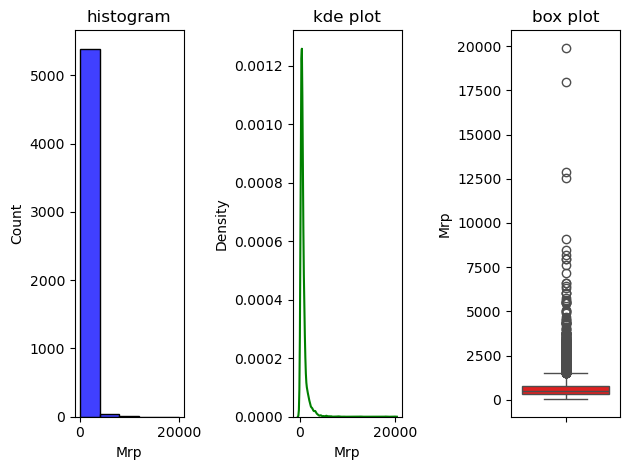

In [149]:
visual_num_univariant(df["Mrp"])

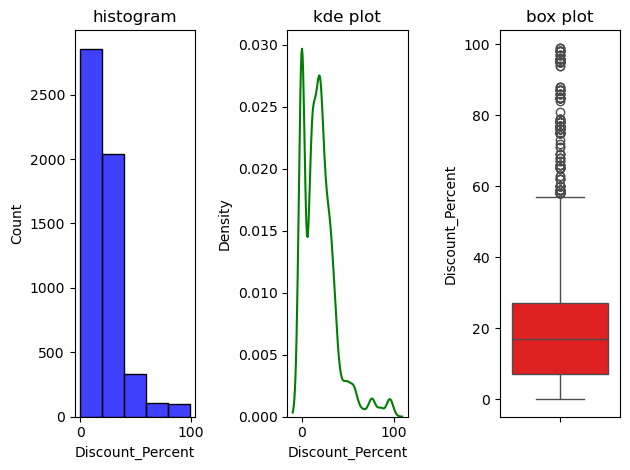

In [150]:
visual_num_univariant(df["Discount_Percent"])

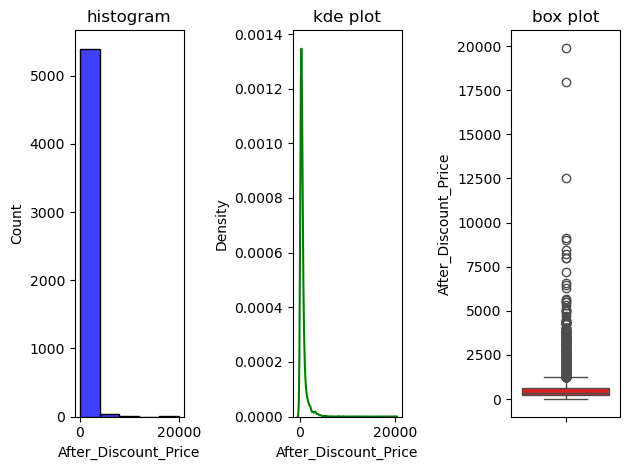

In [151]:
visual_num_univariant(df["After_Discount_Price"])

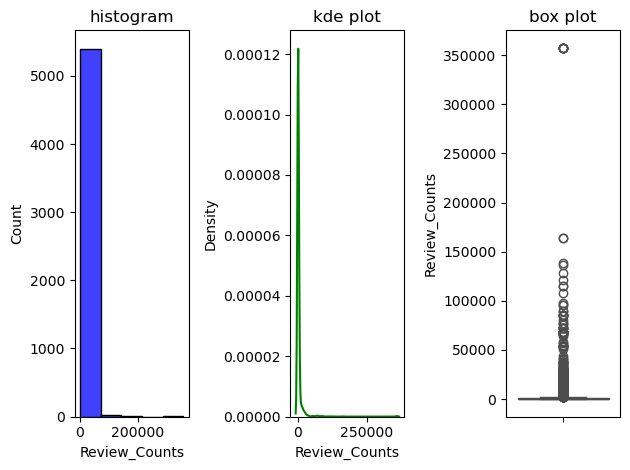

In [152]:
visual_num_univariant(df["Review_Counts"])

<Axes: xlabel='count', ylabel='Title'>

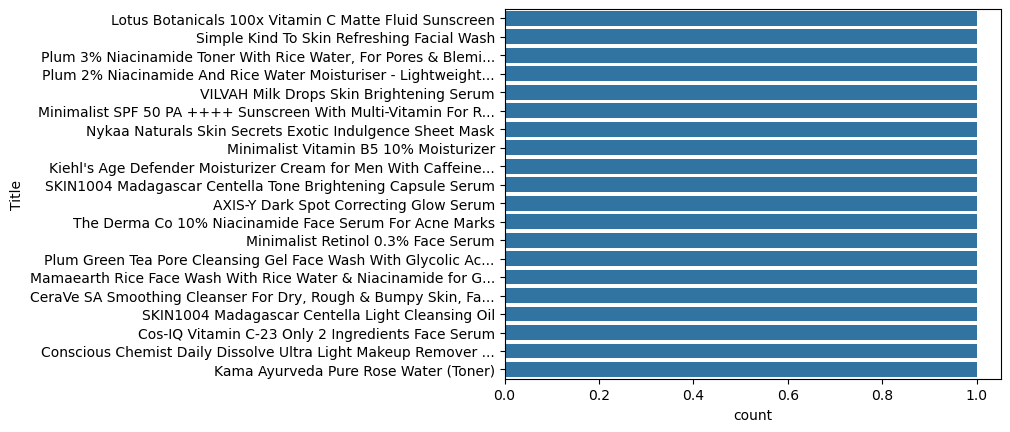

In [153]:
sns.countplot(df["Title"].head(20))

<Axes: xlabel='count', ylabel='Brand'>

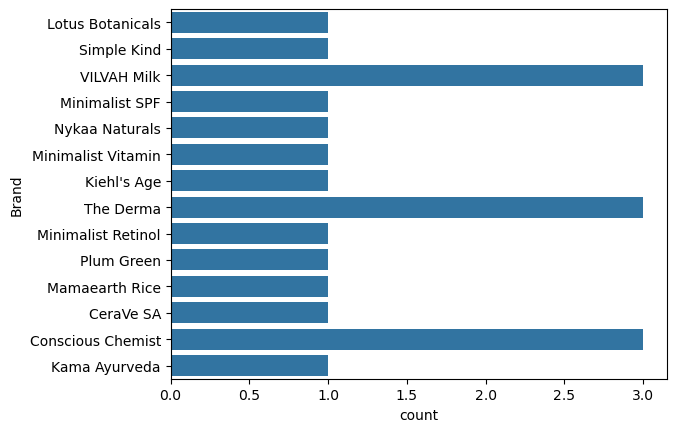

In [154]:
sns.countplot(df["Brand"].head(20))

<Axes: xlabel='count', ylabel='Category'>

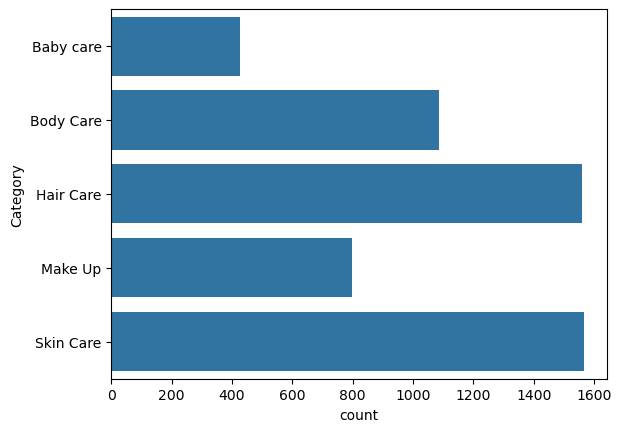

In [155]:
sns.countplot(df["Category"])

<Axes: xlabel='count', ylabel='Sub_Category'>

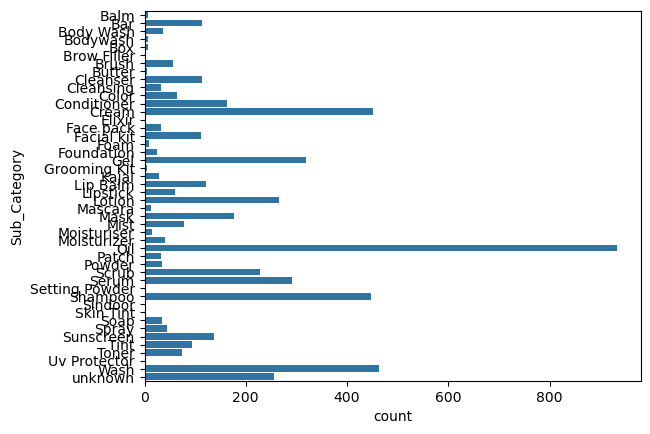

In [163]:
sns.countplot(df["Sub_Category"])

<Axes: xlabel='count', ylabel='Gift'>

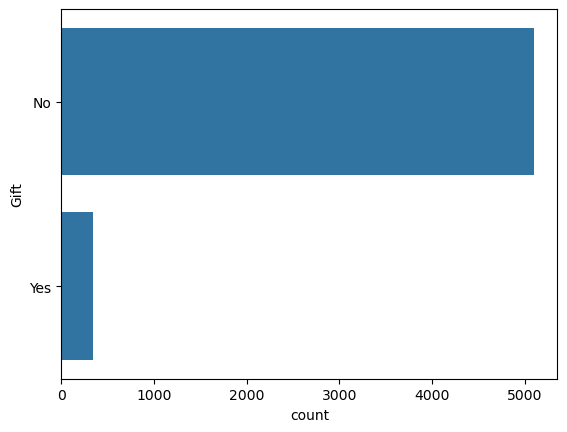

In [164]:
sns.countplot(df["Gift"])

<Axes: xlabel='count', ylabel='Bestseller'>

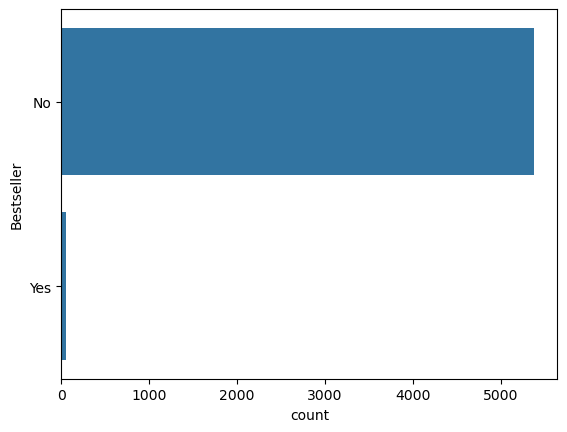

In [165]:
sns.countplot(df["Bestseller"])

In [166]:
### outlier reduction

In [167]:
df["log_Mrp"]=np.log(df1["Mrp"])

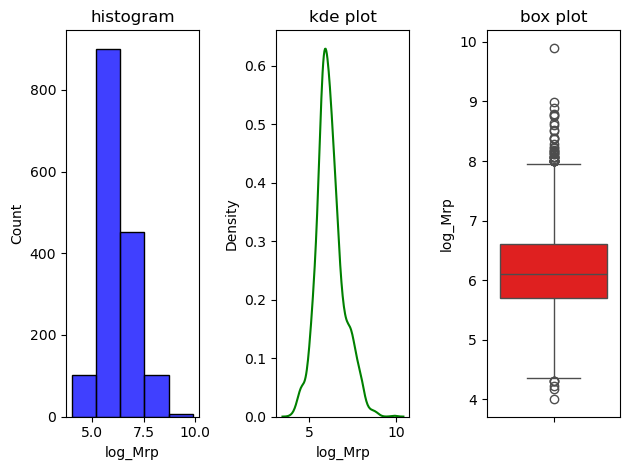

In [168]:
visual_num_univariant(df["log_Mrp"])

In [169]:
df["log_Discount_Percent"]=np.log(df1["Discount_Percent"])

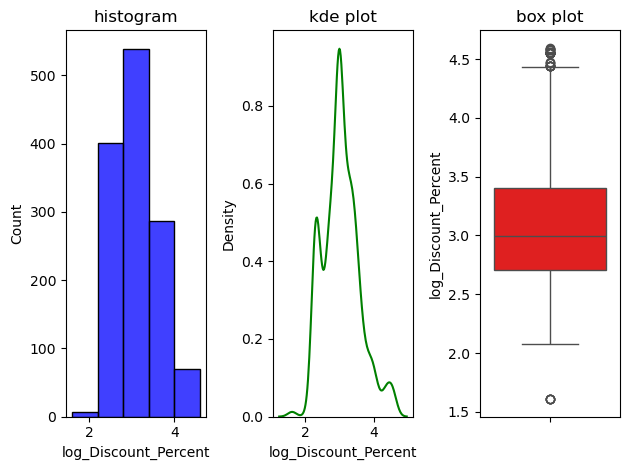

In [170]:
visual_num_univariant(df["log_Discount_Percent"])

In [171]:
df["log_After_Discount_Price"]=np.log(df1["After_Discount_Price"])

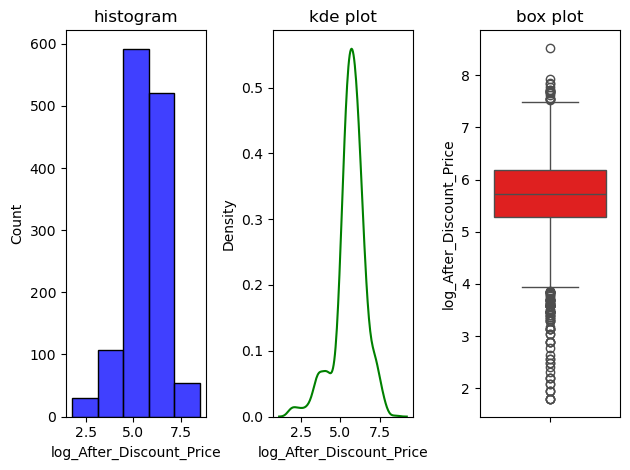

In [172]:
visual_num_univariant(df["log_After_Discount_Price"])

In [173]:
df["log_Review_Counts"]=np.log(df1["Review_Counts"])

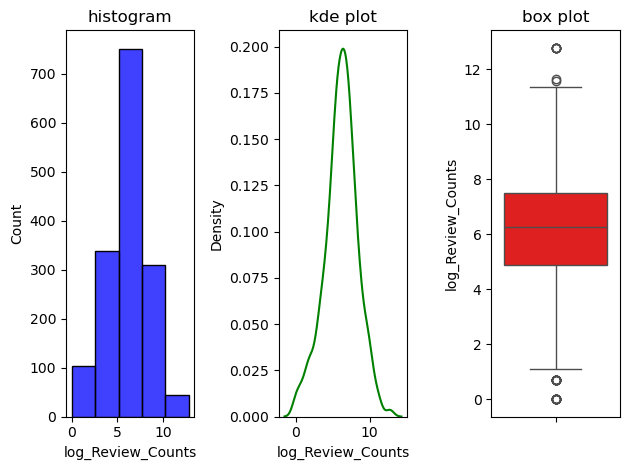

In [174]:
visual_num_univariant(df["log_Review_Counts"])

In [176]:
df

,Title,Brand,Category,Sub_Category,Mrp,Discount_Percent,After_Discount_Price,Review_Counts,Gift,Bestseller,log_Mrp,log_Discount_Percent,log_After_Discount_Price,log_Review_Counts
0,Lotus Botanicals 100x Vitamin C Matte Fluid Su...,Lotus Botanicals,Skin Care,Sunscreen,695,32.0,473.0,647.0,No,No,6.543912,3.465736,6.159095,6.472346
1,Simple Kind To Skin Refreshing Facial Wash,Simple Kind,Skin Care,Wash,420,10.0,378.0,84681.0,No,Yes,6.040255,2.302585,5.934894,11.346647
2,"Plum 3% Niacinamide Toner With Rice Water, For...",VILVAH Milk,Skin Care,Toner,440,58.0,40.0,37453.0,Yes,Yes,6.086775,4.060443,3.688879,10.530842
3,Plum 2% Niacinamide And Rice Water Moisturiser...,VILVAH Milk,Skin Care,Moisturiser,525,12.0,462.0,15869.0,Yes,Yes,6.263398,2.484907,6.135565,9.672123
4,VILVAH Milk Drops Skin Brightening Serum,VILVAH Milk,Skin Care,Serum,640,85.0,60.0,2063.0,No,No,6.461468,4.442651,4.094345,7.631917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,Mom & World Baby Nourishing Lotion,Shiseido Urban,Baby care,Lotion,499,40.0,299.0,62.0,No,No,NaN,NaN,NaN,NaN
5432,Shiseido Urban Environment UV Protector Extra ...,Shiseido Urban,Baby care,Uv Protector,2850,0.0,2850.0,12.0,No,No,NaN,NaN,NaN,NaN
5433,Mom & World Head-to-toe Baby Foaming Wash,Shiseido Perfect,Baby care,Foam,399,63.0,148.0,12.0,No,No,NaN,NaN,NaN,NaN
5434,Mom & World Natural Baby Soap,Shiseido Perfect,Baby care,Soap,199,0.0,199.0,71.0,No,No,NaN,NaN,NaN,NaN


In [177]:
### Product Count by Sub-Category

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\4257313518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df,


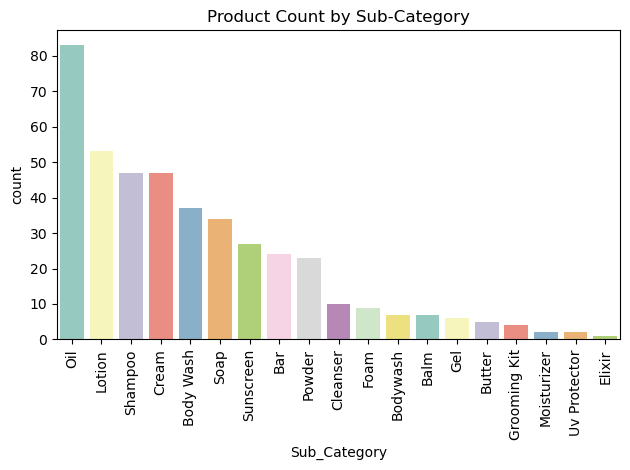

In [178]:
# Remove "Unknown" from Sub_Category for plotting
filtered_df = df5[df5['Sub_Category'] != 'Unknown']

# Re-plot
sns.countplot(data=filtered_df, 
              x='Sub_Category', 
              order=filtered_df['Sub_Category'].value_counts().index, 
              palette='Set3')

plt.title("Product Count by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [179]:
### Price Distribution by Sub-Category

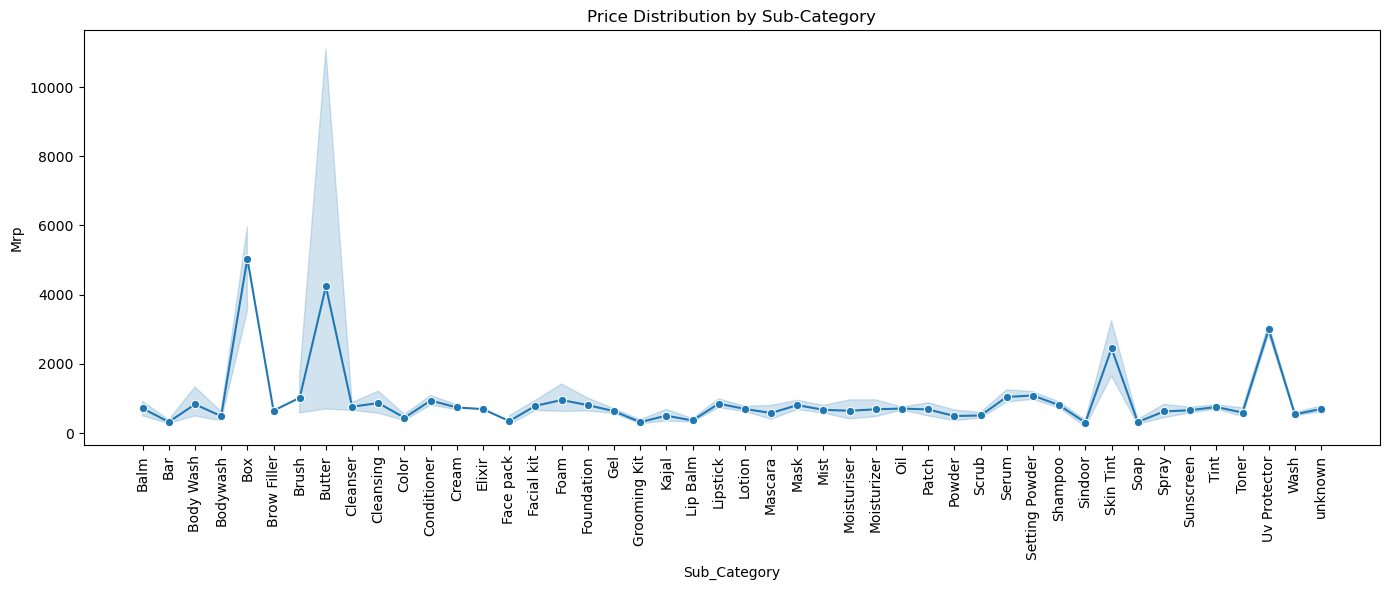

In [180]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Sub_Category', y='Mrp',marker="o")
plt.title("Price Distribution by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [181]:
### Top Brands by Product Count

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\4173388403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='Set2')


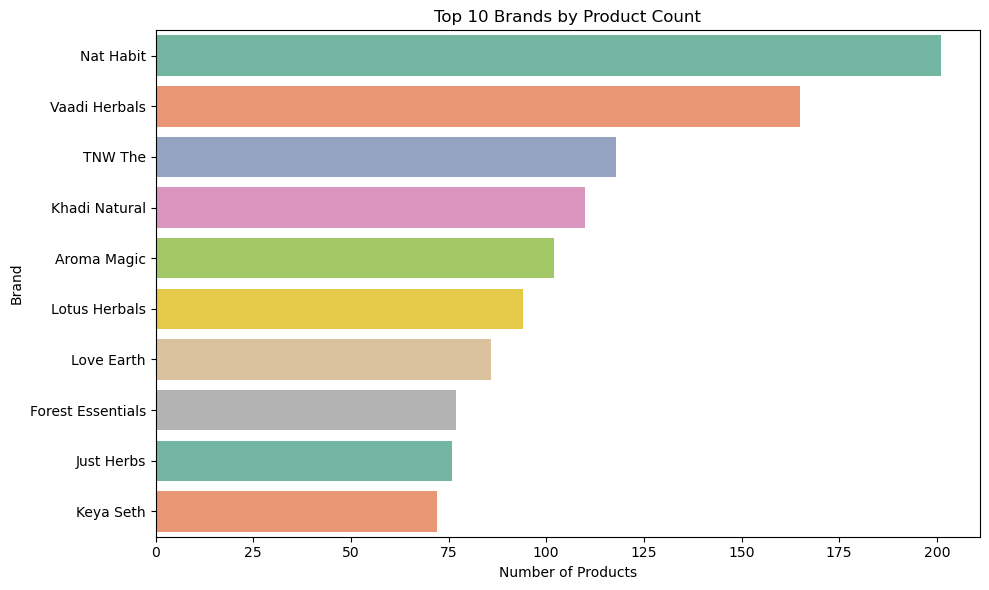

In [182]:
top_brands = df['Brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='Set2')
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [183]:
### Rating Distribution

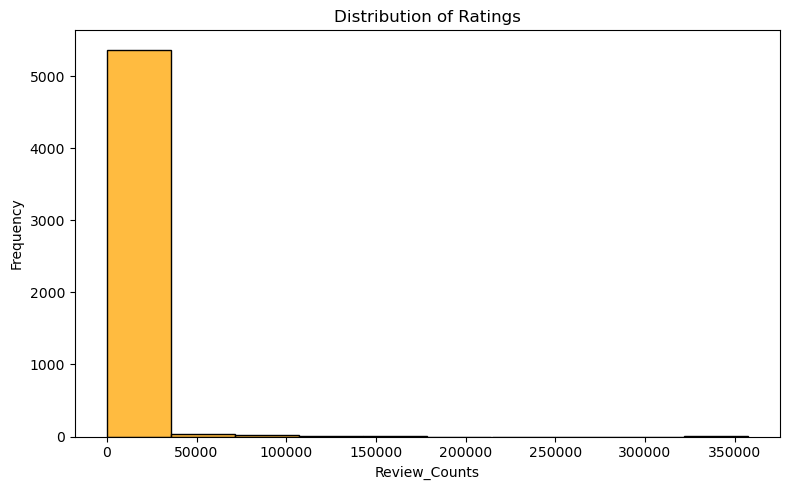

In [184]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Review_Counts'].dropna(), bins=10, kde=False, color='orange')
plt.title("Distribution of Ratings")
plt.xlabel("Review_Counts")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [185]:
### Rating vs Price

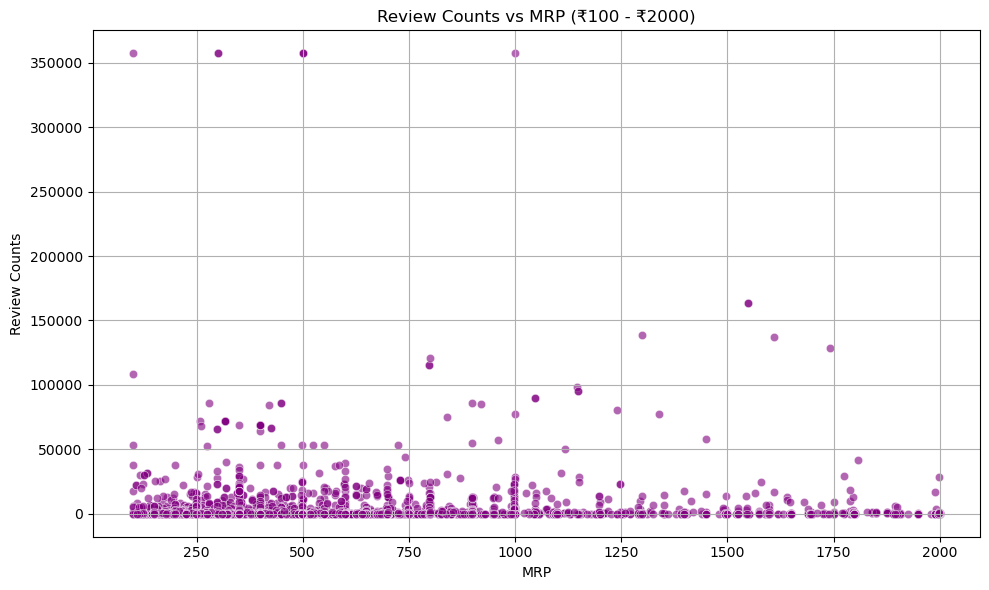

In [200]:
# Step 1: Ensure numeric data
df['Mrp'] = pd.to_numeric(df['Mrp'], errors='coerce')
df['Review_Counts'] = pd.to_numeric(df['Review_Counts'], errors='coerce')

# Step 2: Filter MRP range
subset = df[(df['Mrp'] >= 100) & (df['Mrp'] <= 2000)]

# Step 3: Scatter Plot - Review Count vs MRP
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='Mrp', y='Review_Counts', alpha=0.6, color='purple')
plt.title("Review Counts vs MRP (₹100 - ₹2000)")
plt.xlabel("MRP")
plt.ylabel("Review Counts")
plt.grid(True)
plt.tight_layout()
plt.show()


In [187]:
### Heatmap of Brand vs Category

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\4096398542.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Brand', columns='Category', aggfunc='size', fill_value=0)


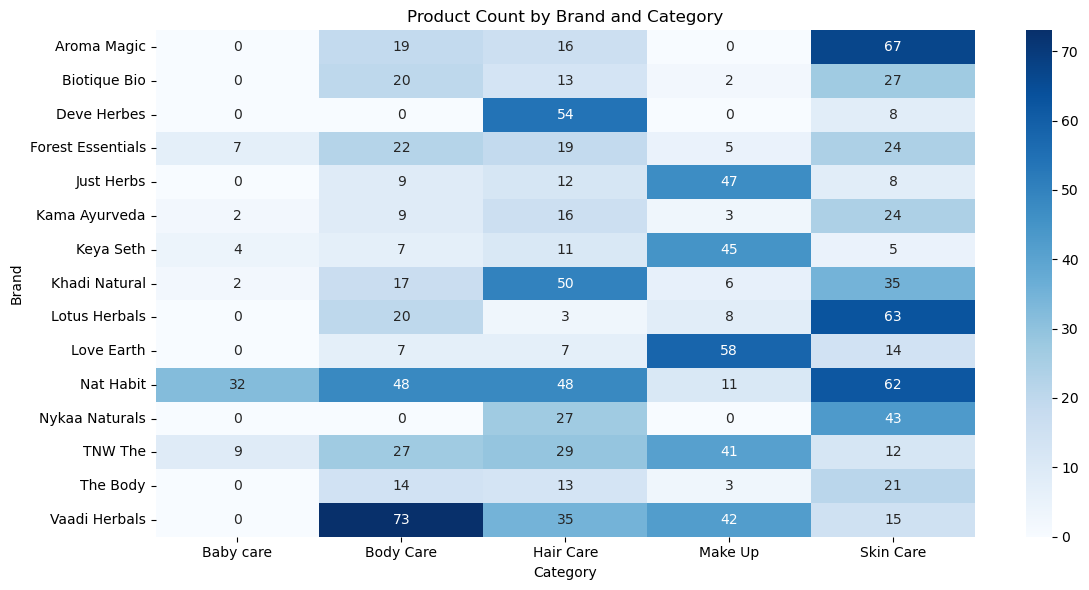

In [188]:
pivot = df.pivot_table(index='Brand', columns='Category', aggfunc='size', fill_value=0)
top_brands = df['Brand'].value_counts().head(15).index
pivot = pivot.loc[pivot.index.intersection(top_brands)]
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title("Product Count by Brand and Category")
plt.tight_layout()
plt.show()

In [189]:
### in each category which sub category has highest demand
### Sub-Category Mix Within Each Category

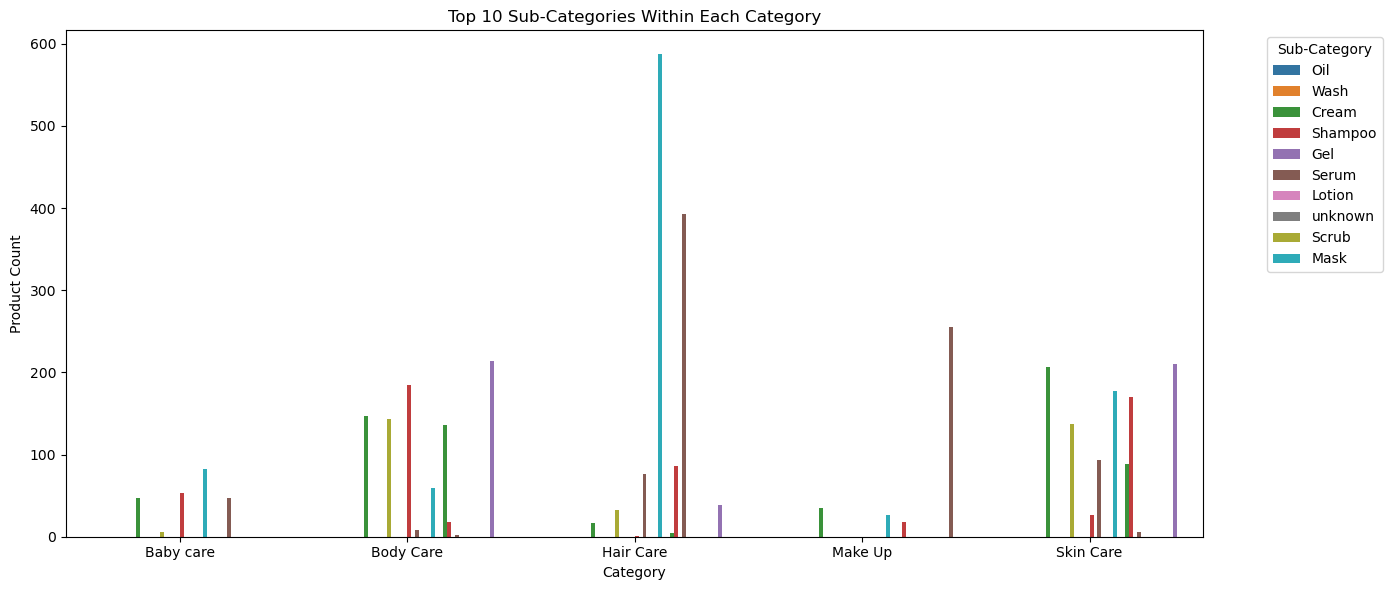

In [191]:
# Step 1: Remove 'Unknown'
df = df[df['Sub_Category'] != 'Unknown']

# Step 2: Get top 10 Sub_Categories
top10_subcats = df['Sub_Category'].value_counts().nlargest(10).index

# Step 3: Filter df with only top 10 sub-categories
df_top10 = df[df['Sub_Category'].isin(top10_subcats)]

# Step 4: Plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top10, x='Category', hue='Sub_Category', palette='tab10')
plt.title("Top 10 Sub-Categories Within Each Category")
plt.xlabel("Category")
plt.ylabel("Product Count")
plt.xticks(rotation=0)
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left', labels=top10_subcats)
plt.tight_layout()
plt.show()


In [207]:
### Top 10 Most Expensive Products

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\1062020193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_expensive, x='Mrp', y='Title', palette='flare')


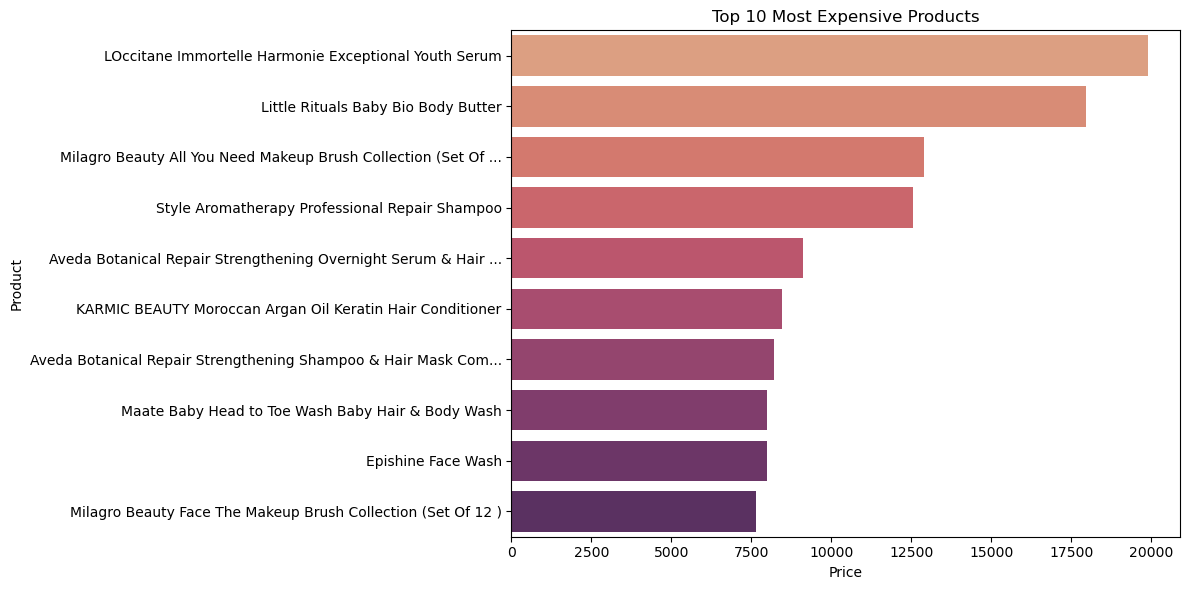

In [208]:
top_expensive = df[['Title', 'Mrp']].dropna().sort_values(by='Mrp', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_expensive, x='Mrp', y='Title', palette='flare')
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Price")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [209]:
### sub categories with highest rating
### Top 10 Sub-Categories by Average Rating

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\862154033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='crest')


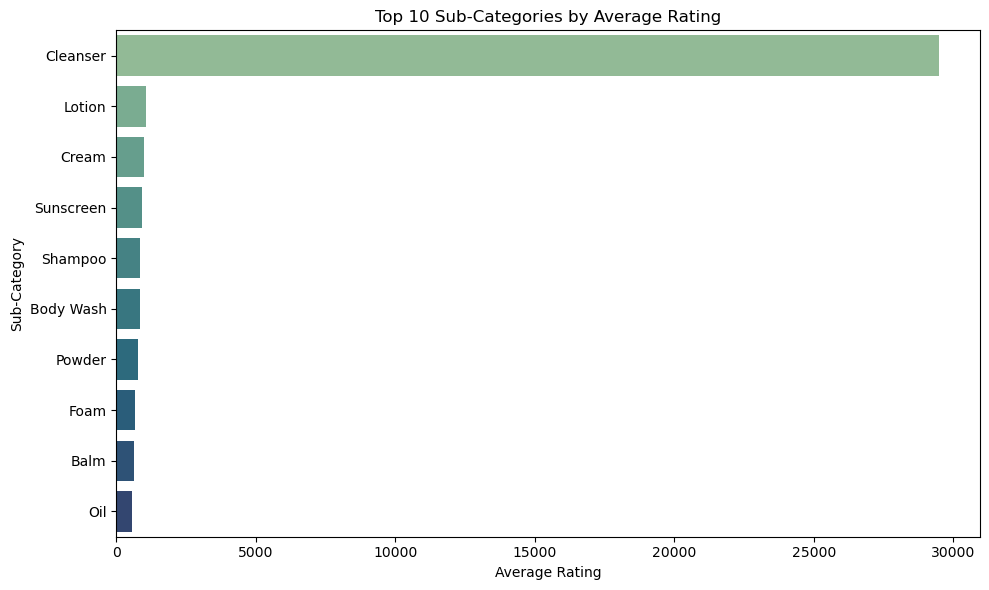

In [210]:
avg_rating = df5.groupby('Sub_Category')['Review_Counts'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='crest')
plt.title("Top 10 Sub-Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

In [211]:
### which sub category is fast selling
### Bestseller Ratio by Sub-Category

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\691945515.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bestseller_ratio = df[df['Bestseller'] == 'Yes'].groupby('Sub_Category').size() / df5.groupby('Sub_Category').size()
C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\691945515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bestseller_ratio.values, y=bestseller_ratio.index, palette='light:#5A9')


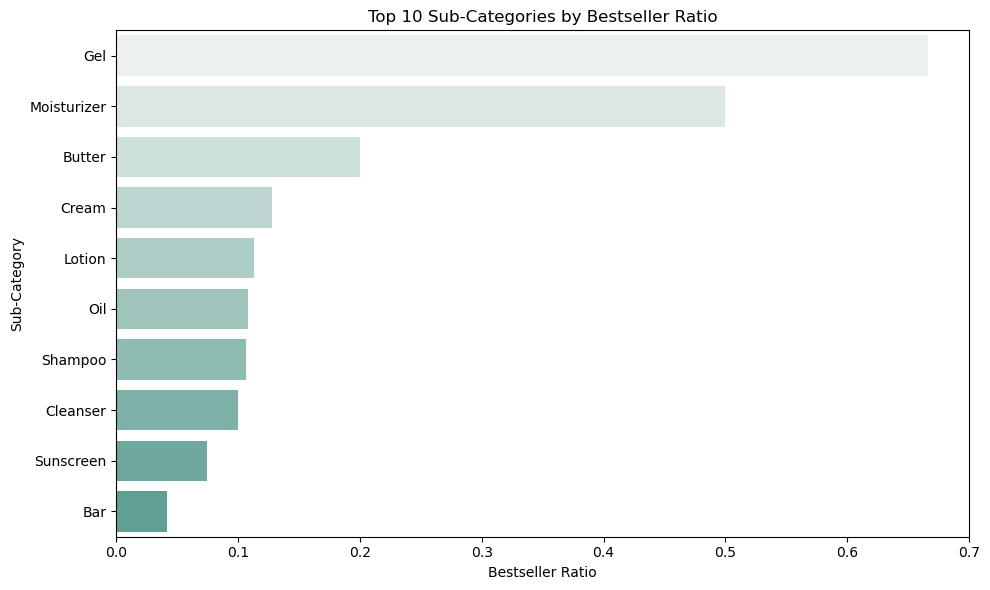

In [212]:
bestseller_ratio = df[df['Bestseller'] == 'Yes'].groupby('Sub_Category').size() / df5.groupby('Sub_Category').size()
bestseller_ratio = bestseller_ratio.dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=bestseller_ratio.values, y=bestseller_ratio.index, palette='light:#5A9')
plt.title("Top 10 Sub-Categories by Bestseller Ratio")
plt.xlabel("Bestseller Ratio")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

In [213]:
### which category has highest review count
### Total Number of Reviews by Category

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\457083385.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_data = df.groupby('Category')['Review_Counts'].sum().sort_values()
C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\457083385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_data.values, y=review_data.index, palette='rocket')


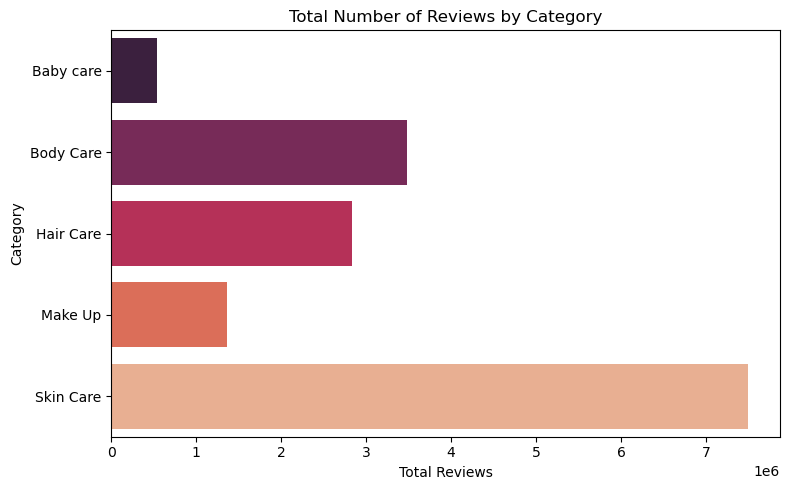

In [214]:
review_data = df.groupby('Category')['Review_Counts'].sum().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=review_data.values, y=review_data.index, palette='rocket')
plt.title("Total Number of Reviews by Category")
plt.xlabel("Total Reviews")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [215]:
### top 10 products with good rating
### rating vs product

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\2900808095.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review_Counts', y='Title', data=top_products, palette='viridis')


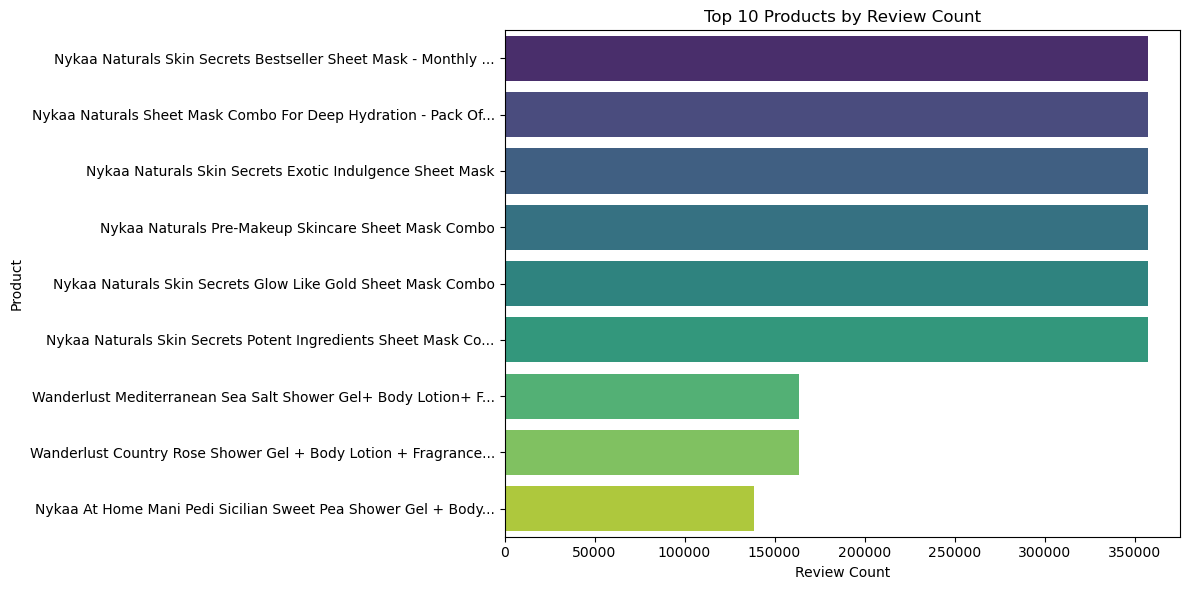

In [216]:
# Step 1: Handle missing reviews
df['Review_Counts'] = df['Review_Counts'].fillna(0)

# Step 2: Sort by Review_Counts
top_products = df[['Title', 'Review_Counts']].sort_values(by='Review_Counts', ascending=False).head(10)

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Review_Counts', y='Title', data=top_products, palette='viridis')

plt.title("Top 10 Products by Review Count")
plt.xlabel("Review Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [217]:
### price trend

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\3151338696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Category', y='Mrp', inner=None, palette='Pastel1')


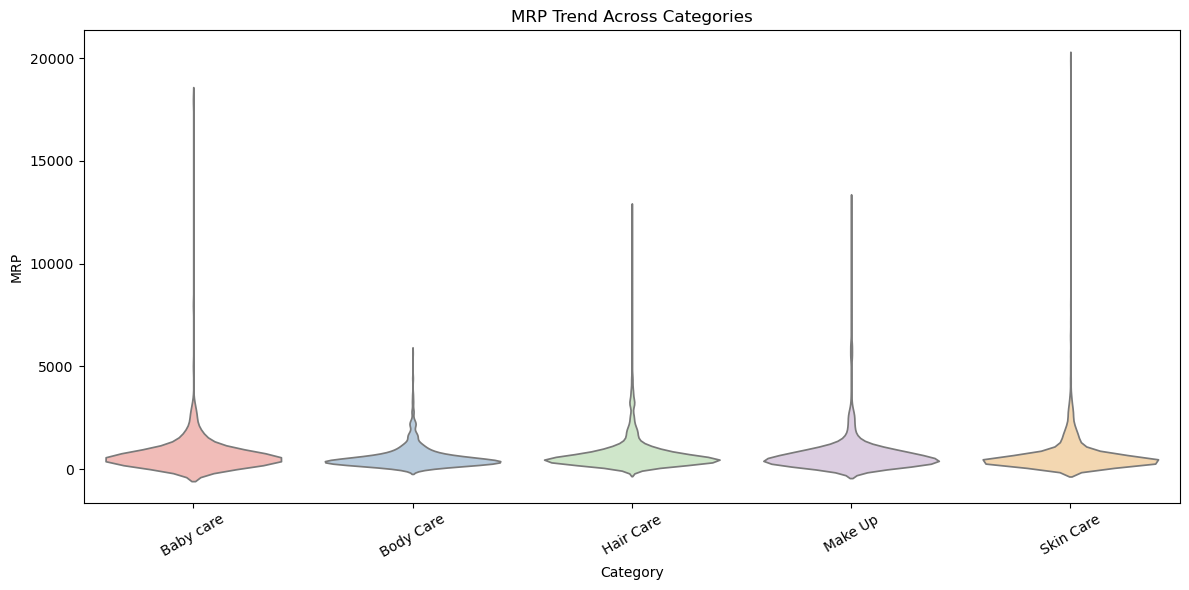

In [218]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Category', y='Mrp', inner=None, palette='Pastel1')
#sns.stripplot(data=df, x='Category', y='Mrp', color='black', size=3, alpha=0.3)
plt.title("MRP Trend Across Categories")
plt.ylabel("MRP")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\3457824102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brand, x='Brand', y='Mrp', palette='Set3')


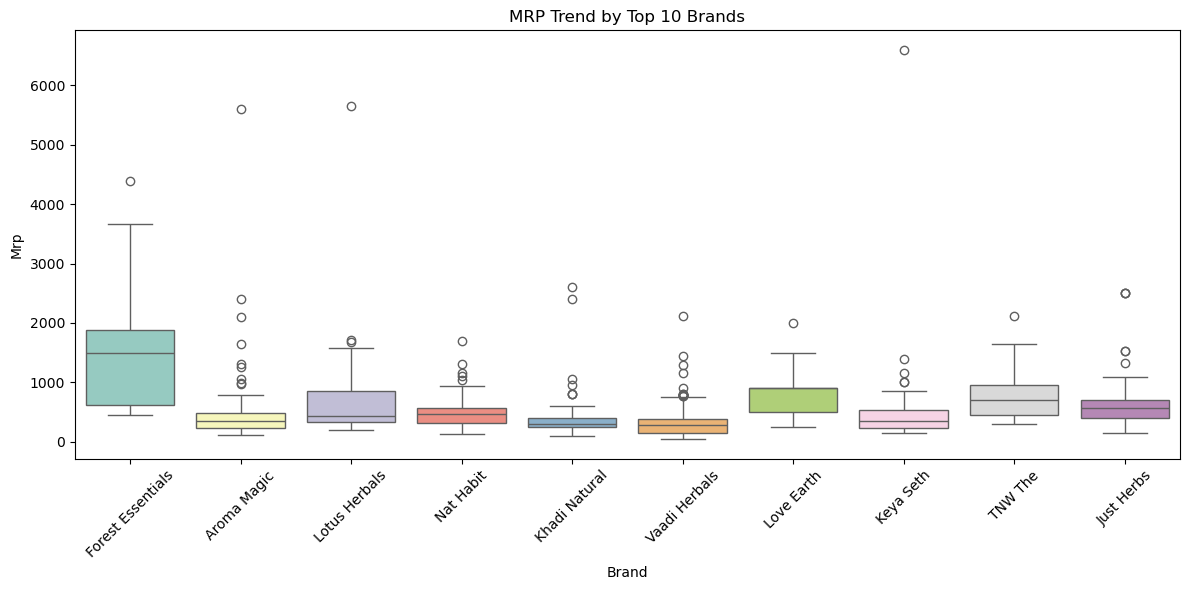

In [206]:
top_brands = df['Brand'].value_counts().head(10).index
df_brand = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_brand, x='Brand', y='Mrp', palette='Set3')
plt.title("MRP Trend by Top 10 Brands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [225]:
### count of each category which provides complementary gifts

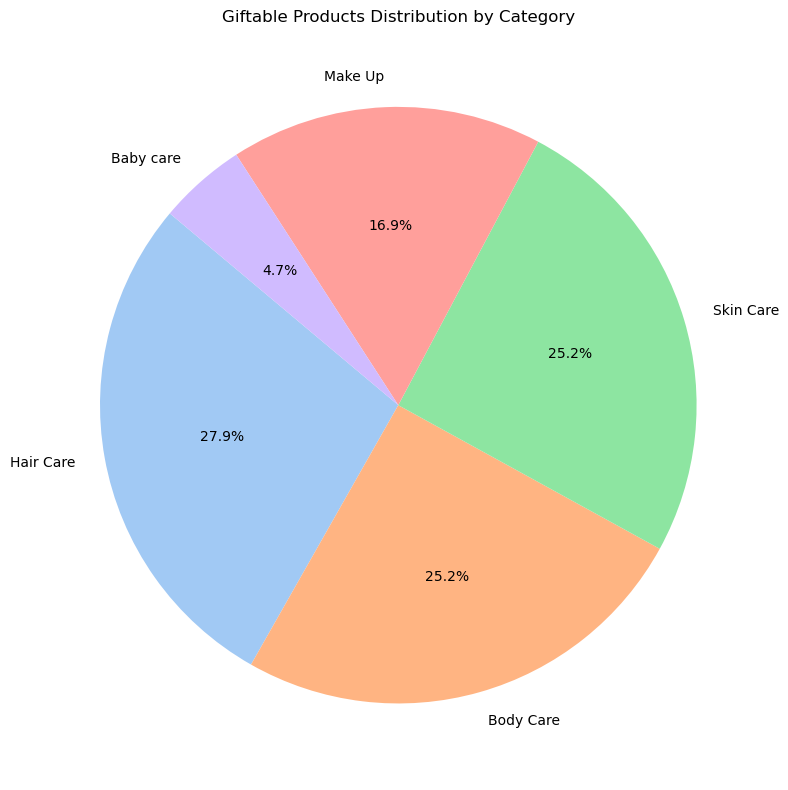

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter rows where Gift == 'Yes'
gifted = df[df['Gift'].str.lower() == 'yes']

# Step 2: Count how many gifted products exist per category
gift_counts = gifted['Category'].value_counts()

# Step 3: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gift_counts,
    labels=gift_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title("Giftable Products Distribution by Category")
plt.axis('equal')  # Keeps pie chart circular
plt.tight_layout()
plt.show()


In [224]:
### best products in each category based on review counts

C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\978049353.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_bestseller_idx = bestsellers.groupby('Category')['Review_Counts'].idxmax()


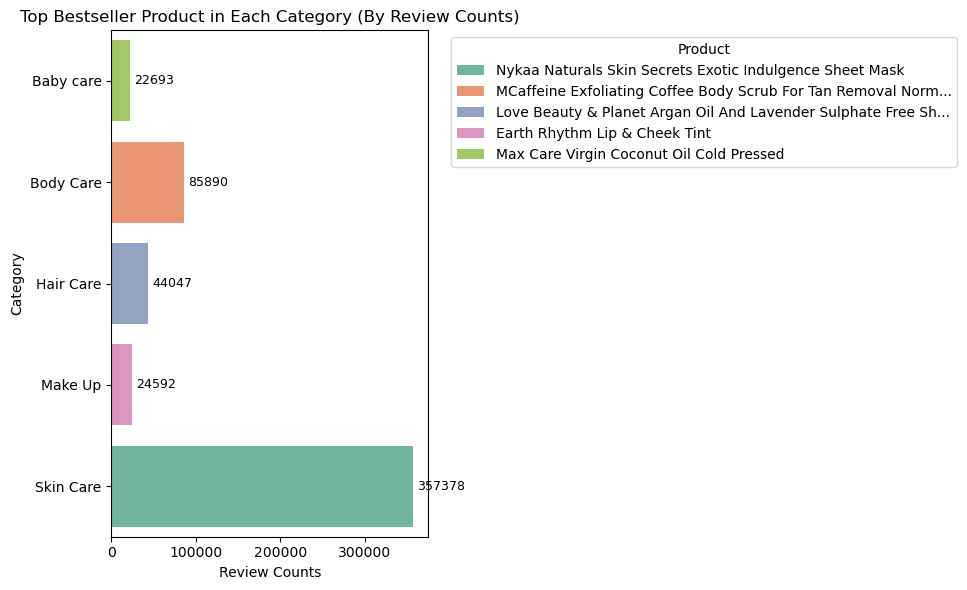

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure proper data types
df['Review_Counts'] = pd.to_numeric(df['Review_Counts'], errors='coerce').fillna(0)
df['Bestseller'] = df['Bestseller'].str.lower()

# Filter for bestseller products only
bestsellers = df[df['Bestseller'] == 'yes']

# Get index of top product per category based on review counts
top_bestseller_idx = bestsellers.groupby('Category')['Review_Counts'].idxmax()

# Select and display top products
top_bestseller_products = bestsellers.loc[top_bestseller_idx, ['Category', 'Title', 'Review_Counts']]
top_bestseller_products = top_bestseller_products.sort_values(by='Review_Counts', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_bestseller_products,
    y='Category',
    x='Review_Counts',
    hue='Title',
    dodge=False,
    palette='Set2'
)

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)

# Customize plot
plt.title("Top Bestseller Product in Each Category (By Review Counts)")
plt.xlabel("Review Counts")
plt.ylabel("Category")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Teja\AppData\Local\Temp\ipykernel_12552\3886235233.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx = df.groupby('Category')['Review_Counts'].idxmax()


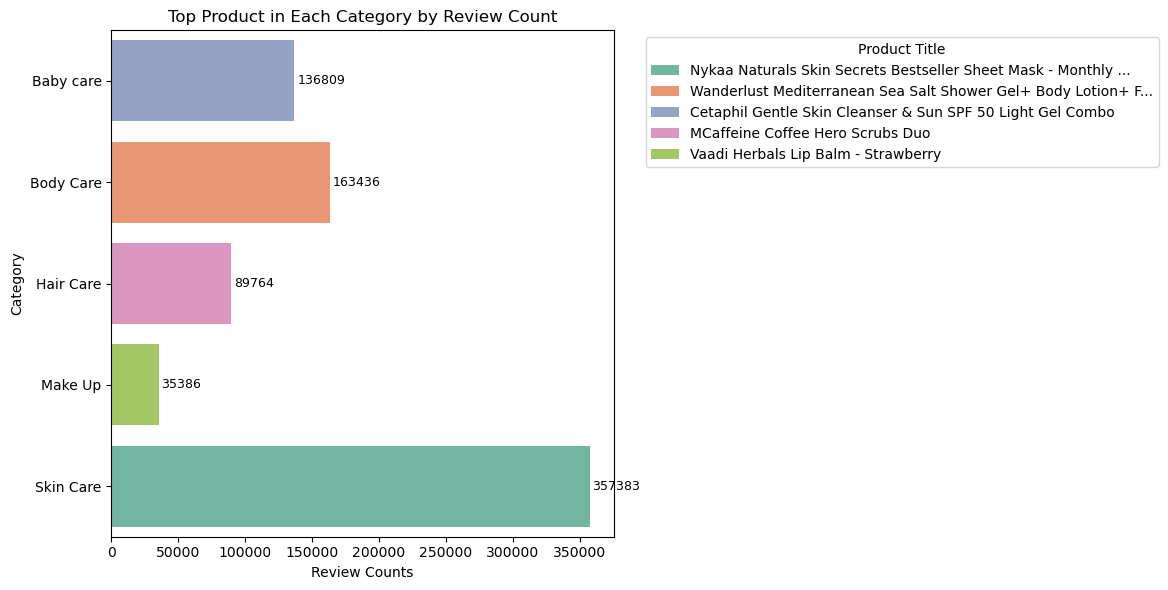

In [227]:
# Ensure numeric and clean review counts
df['Review_Counts'] = pd.to_numeric(df['Review_Counts'], errors='coerce').fillna(0)

# Get index of top product per category
idx = df.groupby('Category')['Review_Counts'].idxmax()

# Extract those rows
top_product_by_category = df.loc[idx, ['Category', 'Title', 'Review_Counts']]

# Sort by review counts (optional)
top_product_by_category = top_product_by_category.sort_values(by='Review_Counts', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_product_by_category,
    x='Review_Counts',
    y='Category',
    hue='Title',
    dodge=False,
    palette='Set2'
)

# Add count labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=2)

plt.title("Top Product in Each Category by Review Count")
plt.xlabel("Review Counts")
plt.ylabel("Category")
plt.legend(title="Product Title", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
